<a href="https://colab.research.google.com/github/fdd-eiu/afew/blob/main/empirical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Empirical bio-economic modelling

In [176]:
!pip install psycopg2 #installation
import psycopg2 #need this to connect to the database you will need to install this from the command line with pip install psycopg2
# This is why you need administrator rights on your computer. Alternatively load the notebook to Google colaboratory and install 
#it there using !pip install psycopg2. You have limited administrator rights on Google colaboratory.
import sqlite3
import io
from sqlalchemy import create_engine
#import gspread # To link to google sheets only needed for google colaboratory
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import * 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [177]:
conn = psycopg2.connect("host=ziggy.db.elephantsql.com  dbname=mlicvbcu user=mlicvbcu password=AuMX7YrqTbiCNvCx9Cy22vF4kKk7MqOe") 
cur = conn.cursor() 

In [178]:
cur.execute('SELECT * FROM ace;') # write SQL query in brackets
data = cur.fetchall()

col_names = []
for elt in cur.description:
    col_names.append(elt[0])

df = pd.DataFrame(data, columns=col_names) # Need to add headers after this call. So need to document this in Manual
df #This is a data frame you can writexl to write to Excel file

#close the connection after you ahve obtained the data
cur.close() 
conn.close()

In [179]:
df

,yr,gr_id,flag_id,fleet_id,ez_id,days,skj_c,yft_c,bet_c,days_arch,skj_arch_c,yft_arch_c,bet_arch_c,alb_c,bum_c,blm_c,mls_c,swo_c
0,1990-01-10,G,JP,NA,I6,0,8326,49,61,0,0,0,0,9885,252,0,1926,102.0
1,1990-01-10,G,TW,NA,I6,0,0,0,0,0,0,0,0,1859,0,0,0,NaN
2,1990-01-10,H,ID,NA,ID,0,0,5247,167,0,0,4198,134,0,272,17,0,1.0
3,1990-01-10,H,PH,NA,PH,0,0,9012,278,0,0,7210,222,0,4191,266,0,15.0
4,1990-01-10,K,PH,NA,PH,0,9444,36049,3962,0,7555,28839,3170,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7066,2019-01-10,T,US,AS,AS,0,6,1,0,0,0,0,0,0,0,0,0,0.0
7067,2019-01-10,T,US,GU,GU,0,218,38,0,0,0,0,0,0,25,0,0,0.0
7068,2019-01-10,T,US,HW,HW,0,104,404,35,0,0,0,0,1,151,2,13,0.0
7069,2019-01-10,T,US,MP,MP,0,157,17,0,0,0,0,0,0,2,0,0,0.0


In [180]:
soldata = df[df['gr_id']=='L']
soldata.tail()

,yr,gr_id,flag_id,fleet_id,ez_id,days,skj_c,yft_c,bet_c,days_arch,skj_arch_c,yft_arch_c,bet_arch_c,alb_c,bum_c,blm_c,mls_c,swo_c
6947,2019-01-10,L,VU,NA,TV,83,3,28,17,0,0,0,0,30,4,0,0,1.0
6948,2019-01-10,L,VU,NA,VU,25,0,0,0,0,0,0,0,14,0,0,0,1.0
6949,2019-01-10,L,WF,NA,WF,0,0,0,0,0,0,0,0,0,0,0,0,0.0
6950,2019-01-10,L,WS,NA,H4,15,0,1,1,0,0,0,0,7,0,0,0,0.0
6951,2019-01-10,L,WS,NA,I7,6,0,1,0,0,0,0,0,4,0,0,0,0.0


In [181]:
soldata2 = pd.DataFrame(soldata)
soldata2['yr'] = pd.to_datetime(soldata2['yr'])
soldata2[soldata2['yr'] > '2010-01-10']
soldata2 = soldata2[soldata2['gr_id'] =='L']

days = soldata2['days']
catch = soldata2['bet_c']
print(catch,days)

5       23
6        0
7        0
8        6
9        0
        ..
6947    17
6948     0
6949     0
6950     1
6951     0
Name: bet_c, Length: 3340, dtype: int64 5       2841
6          1
7          1
8          0
9          0
        ... 
6947      83
6948      25
6949       0
6950      15
6951       6
Name: days, Length: 3340, dtype: int64


In [182]:
soldata2

,yr,gr_id,flag_id,fleet_id,ez_id,days,skj_c,yft_c,bet_c,days_arch,skj_arch_c,yft_arch_c,bet_arch_c,alb_c,bum_c,blm_c,mls_c,swo_c
5,1990-01-10,L,AU,AU,AU,2841,63,786,23,0,0,0,0,124,18,13,66,2.0
6,1990-01-10,L,AU,AU,I7,1,0,0,0,0,0,0,0,0,0,0,0,NaN
7,1990-01-10,L,AU,AU,NF,1,0,0,0,0,0,0,0,0,0,0,0,NaN
8,1990-01-10,L,AU,JV,AU,0,0,4,6,0,0,0,0,145,0,0,0,NaN
9,1990-01-10,L,BZ,NA,I4,0,0,0,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,2019-01-10,L,VU,NA,TV,83,3,28,17,0,0,0,0,30,4,0,0,1.0
6948,2019-01-10,L,VU,NA,VU,25,0,0,0,0,0,0,0,14,0,0,0,1.0
6949,2019-01-10,L,WF,NA,WF,0,0,0,0,0,0,0,0,0,0,0,0,0.0
6950,2019-01-10,L,WS,NA,H4,15,0,1,1,0,0,0,0,7,0,0,0,0.0


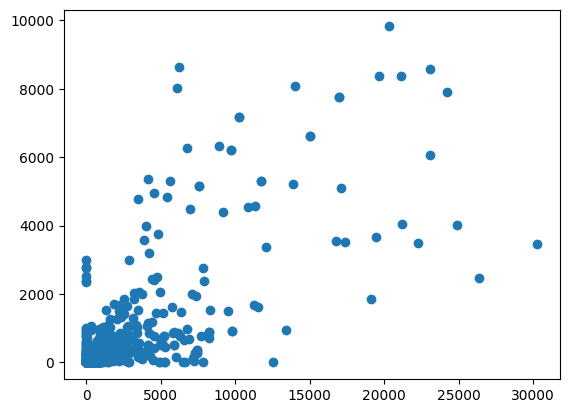

In [183]:
plt.scatter(days,catch)

$\frac{dx}{dt} = r x(1 - x/K) - q E x$

- $r$ is theintrinsic growth rate
- $x$ stock
- $K$ is carrying capacity (in steady-sate this is unfished biomass)
- $q$ is catchability

In [184]:
x = Function('x')
r, q, K, E, t, x, p, c = symbols('r q K E t x p c')
#ode = Eq(diff(x(t),t), r*x(t)*(1 - x(t)/K)-q*x(t)*E)
#simplify(dsolve(ode,x(t)))


In [185]:
eqn = r*x*(1 - x/K) - q*x*E 
simplify(eqn)
xss = solve(eqn, x) # to finf the steady-state
xss[1]

K*(-E*q + r)/r

Rent $p q X E - c E$

In [186]:
rent = p*q*x*E - c*E
rentss = rent.subs(x,xss[1]) #replace x with xss[1] which is the steady-state
simplify(rentss)

E*(-K*p*q*(E*q - r) - c*r)/r

In [187]:
h = q*x*E
catchss = h.subs(x,xss[1])
collect(catchss,E)


E*K*q*(-E*q + r)/r

Simplifying $$ E K q ( r - E q)/r $$

$$ Kq E - K\frac{q^2}{r} E^2$$

Regression:

$y_i = \beta_0 + b_1 E  + b_2 E^2 + e_i$$



In [188]:
#cpue = catchss/E
#cpue

K*q*(-E*q + r)/r

In [189]:
a = Symbol('a')
cpue.subs('Kq',a)

K*q*(-E*q + r)/r

In [196]:
x = soldata2['days']

y = catch
y = y.values


X =  np.column_stack((x, x**2))

X 
y

array([23,  0,  0, ...,  0,  1,  0])

$K(1 - \frac{q}{r} E) E$

In [197]:
import statsmodels.api as sm #Import statsmodels for econometrics

# need to define y and X you should already have extracted the data and plotted it
# so you just need to pass catch to y and days and day squared to X


model = sm.OLS(y,X,missing='drop')
results = model.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.634
Model:                            OLS   Adj. R-squared (uncentered):              0.634
Method:                 Least Squares   F-statistic:                              89.41
Date:                Tue, 06 Jun 2023   Prob (F-statistic):                    1.49e-38
Time:                        23:34:19   Log-Likelihood:                         -25167.
No. Observations:                3340   AIC:                                  5.034e+04
Df Residuals:                    3338   BIC:                                  5.035e+04
Df Model:                           2                                                  
Covariance Type:                  HAC                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------